In [48]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
plt.rcParams['figure.figsize'] = (20,10)
import seaborn as sns
import sklearn
import statistics

In [54]:
data = pd.read_csv('headbrain.csv')

In [56]:
print(data.shape)
data.head()

(237, 4)


,Gender,Age Range,Head Size(cm^3),Brain Weight(grams)
0,1,1,4512,1530
1,1,1,3738,1297
2,1,1,4261,1335
3,1,1,3777,1282
4,1,1,4177,1590


In [57]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 237 entries, 0 to 236
Data columns (total 4 columns):
 #   Column               Non-Null Count  Dtype
---  ------               --------------  -----
 0   Gender               237 non-null    int64
 1   Age Range            237 non-null    int64
 2   Head Size(cm^3)      237 non-null    int64
 3   Brain Weight(grams)  237 non-null    int64
dtypes: int64(4)
memory usage: 7.5 KB


## Least Square Method 

In [72]:
#collecting x and y 
x = data['Head Size(cm^3)'].values
y = data['Brain Weight(grams)'].values

In [73]:
#mean x and mean y
x_mean = np.mean(x)
y_mean = np.mean(y)

In [74]:
#total number of values
m = len(x)

#calculating b1 and b0
num = 0
den = 0
for i in range(m):
    num += (x[i]-x_mean) * (y[i] - y_mean)
    den += (x[i]-x_mean)**2
    
b1 = num/den
b0 = y_mean - (b1*x_mean)
print(b1,b0)#b1 is slope b0 is intercept


0.26342933948939945 325.57342104944223


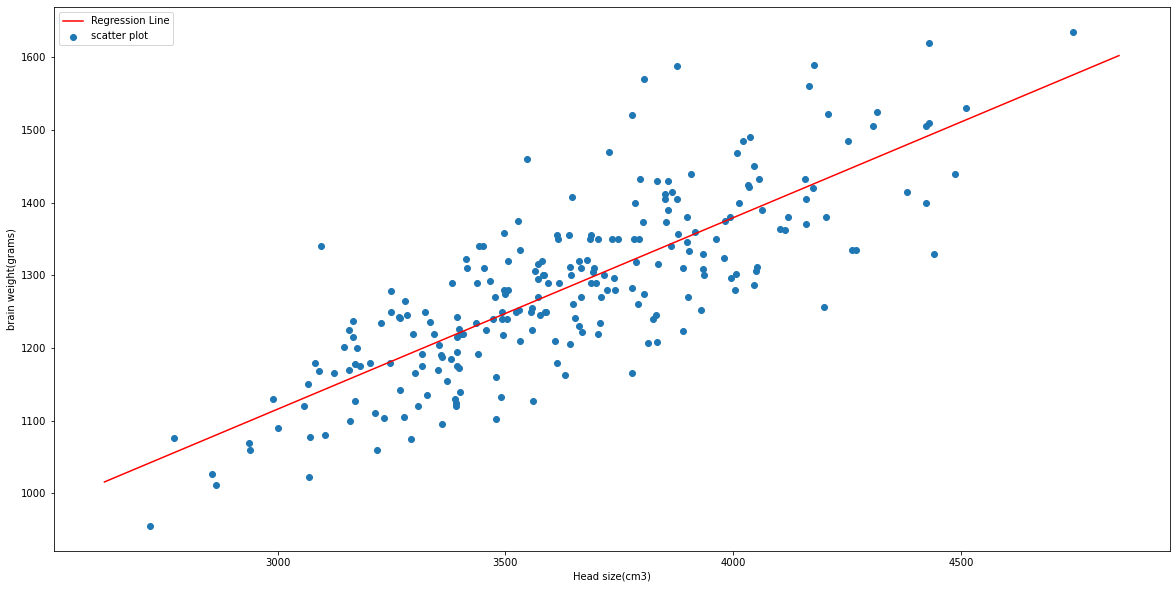

In [75]:
xmax = np.max(x) +100
xmin = np.min(x) -100

#calculating line values x and y
X = np.linspace(xmin,xmax,1000)
Y = b0 + b1 * X

#plotting line
plt.plot(X,Y, color = 'r', label = 'Regression Line')
plt.scatter(x,y, label = 'scatter plot')

plt.xlabel('Head size(cm3)')
plt.ylabel('brain weight(grams)')
plt.legend()
plt.show()

In [76]:
#calculating R square value
ss_r = 0
ss_t = 0
for i in range(m):
    y_pred = b0 + b1 * x[i]
    ss_r += (y[i]-y_pred)**2
    ss_t += (y[i]-y_mean)**2
    
r2 = 1 - (ss_r/ss_t)
print(r2)

0.6393117199570003


value of r square is 0.63 which is pretty good hence our model is correct

## scikit learn model for linear regression

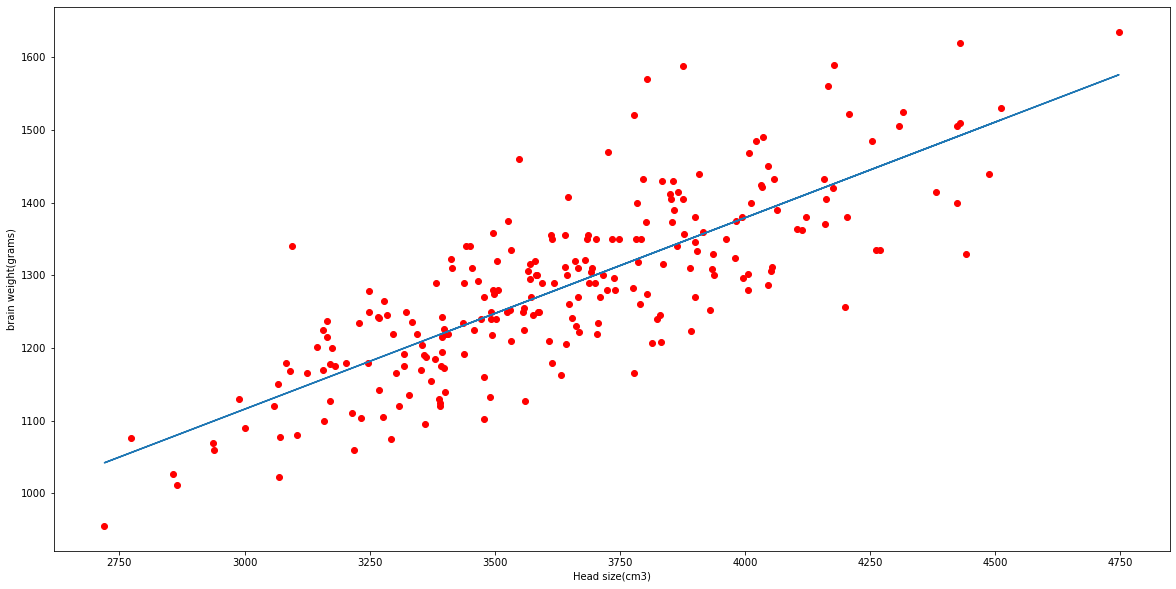

0.639311719957


In [86]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

#cannot use rank 1 matrix in scikit learn
x = x.reshape((m,1))

#creating model
reg = LinearRegression()

#Fitting Trainig data
reg = reg.fit(x,y)
#y prediction
y_predict = reg.predict(x)

plt.plot(x,y_predict)
plt.scatter(x,y,color = 'r')
plt.xlabel('Head size(cm3)')
plt.ylabel('brain weight(grams)')
plt.show()

r2_score = reg.score(x,y)
print(r2_score)